<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Время-продажи-квартир" data-toc-modified-id="Время-продажи-квартир-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Время продажи квартир</a></span></li><li><span><a href="#Поиск-зависимостей" data-toc-modified-id="Поиск-зависимостей-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Поиск зависимостей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Это данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
try:
    data = pd.read_csv(--, sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [17]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод
Мы видим большое количество пропусков. В столбце first_day_exposition необходимо изменить тип данных на datetime. В столбце floors_total, balcony, parks_around3000, ponds_around3000, days_exposition  необходимо изменить тип на int64. 

## Предобработка данных

Найдем дубликаты.

In [18]:
data.duplicated().sum()

0

In [19]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Изменим тип столбца first_day_exposition на datetime.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

узнаем количество пропусков.

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изменим столбец is_apartment так чтобы 1=True 0=False
Строки с пропушенными значениями скорее всего не являются апартаментами. 

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(int)

In [23]:
data['is_apartment'].isna().sum()

0

In [24]:
data['is_apartment'].unique()

array([0, 1])

В столбце ceiling_height много пропусков. Узнаем от чего наиболее сильно зависит высота потолков.

In [27]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.026958,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.154959,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,-0.026351,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.154959,-0.026351,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.043119,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,-0.003657,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


Не один из факторов не оказывает сильного влияния, однако самая большая зависимость от общей площади.

In [28]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Явно присутствуют некорректные значения.

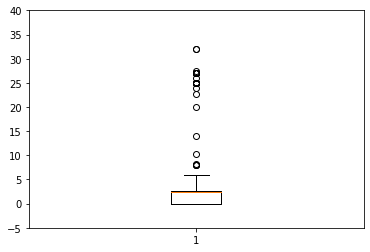

In [29]:
data['ceiling_height'] = data['ceiling_height'].fillna(0)
plt.ylim(-5,40)
plt.boxplot(data['ceiling_height'])
plt.show()

Значения больше 6 являются выбросами.

In [30]:
data[data['ceiling_height'] > 6]['ceiling_height'].count()

29

In [31]:
data[(data['ceiling_height'] < 2) & (data['ceiling_height'] != 0)]['ceiling_height'].count()

3

Их удаление не повляет на рзультаты.

In [32]:
data = data.query('(ceiling_height < 6) & (ceiling_height > 2 | ceiling_height == 0)')

In [33]:
data[data['ceiling_height'] > 6]['ceiling_height'].count()

0

In [34]:
data[(data['ceiling_height'] < 2) & (data['ceiling_height'] != 0)]['ceiling_height'].count()

0

Проверим изменения

In [35]:
data['ceiling_height'].describe()

count    23655.000000
mean         1.667054
std          1.346880
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

Посмотрим на данные об общей площади

In [36]:
data['total_area'].describe()

count    23655.000000
mean        60.360987
std         35.666877
min         12.000000
25%         40.000000
50%         52.000000
75%         69.950000
max        900.000000
Name: total_area, dtype: float64

Напишем функцию разделющие недвижимость на категории исхоя из их площади. А так же создадим отдельную таблицу для расчета медианных значений.

In [37]:
def area_type(area_value):
    if (area_value < 40):
        return 'Маленькая'
    if (area_value <= 40) and (area_value < 52):
        return 'Меньше среднего'
    if (area_value <= 52) and (area_value < 60):
        return 'Средняя'
    if (area_value <= 60) and (area_value < 70):
        return 'Больше среднего'
    return 'Большая'

area= pd.DataFrame(data['total_area'])
area['type'] = area['total_area'].apply(area_type)
area['ceiling_height'] = data['ceiling_height']
area_pivot_ceiling = area.pivot_table(index='type',
                                      values='ceiling_height',
                                      aggfunc=['median','mean'])
area_pivot_ceiling.columns = ['median','mean']
area_pivot_ceiling

,median,mean
type,,
Большая,2.6,1.846948
Больше среднего,2.5,1.637791
Маленькая,2.5,1.483930
Меньше среднего,2.5,1.459361
Средняя,2.5,1.610812


Нулевые значения сильно влияют на среднее поэтому возьмём медиану и присвоим её значение исходя из группы.

In [38]:
area.loc[(area['ceiling_height'] == 0) & (area['type'] == 'Большая'), 'ceiling_height'] = 2.6
area.loc[area['ceiling_height'] == 0, 'ceiling_height'] = 2.6
area.loc[area['ceiling_height'] == 0]['ceiling_height'].count()

0

Заменим значение столбца в data на аналогичный в area но с уже убранными пропусками.

In [39]:
data['ceiling_height'] = area['ceiling_height']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Узнаем количество пропусков в столбце floors_total

In [40]:
data['floors_total'].isna().sum()

86

Для этих пропусков нет подходяшей замены и их количество слишком мало что бы повлиять на данные. Удалим их.

In [41]:
data = data.dropna(subset=['floors_total'])

In [42]:
data['living_area'].isna().sum()

1868

In [43]:
data['kitchen_area'].isna().sum()

2223

Заменим пропуски в столбце living_area и kitchen_area. Добавим в таблицу area данные о жилой площади и кухни.

In [44]:
area['kitchen_area'] = data['kitchen_area']
area['living_area'] = data['living_area']

Расчитаем соотношение жилой площади и кухни к общей.

In [45]:
area['kitchen_ratio'] = area['kitchen_area'] / area['total_area']
area['living_ratio'] = area['living_area'] / area['total_area']
area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23655 entries, 0 to 23698
Data columns (total 7 columns):
total_area        23655 non-null float64
type              23655 non-null object
ceiling_height    23655 non-null float64
kitchen_area      21346 non-null float64
living_area       21701 non-null float64
kitchen_ratio     21346 non-null float64
living_ratio      21701 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.4+ MB


Заменим пропуски исходя из группы.

In [46]:
def non_nan_val(data, value, cat, ratio):
    for unique_type in data[cat].unique():
        data.loc[(data[value].isna()) & (data[cat] == unique_type), value] =\
        data['total_area'] * data.loc[data[cat] == unique_type, ratio].median()
    return data

In [47]:
area = non_nan_val(area, 'kitchen_area', 'type', 'kitchen_ratio')
area = non_nan_val(area, 'living_area', 'type', 'living_ratio')

Проверим наличие пропусков в столбцах living_area и kitchen_area.

In [48]:
area.isna().sum()

total_area           0
type                 0
ceiling_height       0
kitchen_area         0
living_area          0
kitchen_ratio     2309
living_ratio      1954
dtype: int64

In [49]:
data['kitchen_area'] = area['kitchen_area']
data['living_area'] = area['living_area']

Отсутствие значений в столбце balcony вероятнее всего указывает на их отсутствие. Заменим их на 0.

In [50]:
data['balcony'] = data['balcony'].fillna(0)

Проспусков в столбце всего 49 удалим их так как это не повлияет на результаты

In [51]:
data['locality_name'].isna().sum()

48

In [52]:
data = data.dropna(subset=['locality_name'])

Оставим только названия населенных пунктов.

In [53]:
def locality(data):
    loc_split = data.split()
    for word in loc_split:
        if word != word.lower():
            return word
        loc_join = word
    return loc_join
data['locality_name'] = data['locality_name'].apply(locality)

In [54]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5505
cityCenters_nearest      5482
parks_around3000         5481
parks_nearest           15504
ponds_around3000         5481
ponds_nearest           14499
days_exposition          3162
dtype: int64

Узнаем сколько пропусков мы сможем заменить исходя из населенного пункта.

In [55]:
air_gr = data.groupby('locality_name', as_index=False)[['airports_nearest']].median()
air_gr = air_gr.dropna()
len(air_gr)

25

In [56]:
cent_gr = data.groupby('locality_name', as_index=False)[['cityCenters_nearest']].median()
cent_gr = cent_gr.dropna()
len(cent_gr)

25

Проверим одни и те же это насеселенные пункты или нет.

In [57]:
total = 0
for i in air_gr['locality_name']:
    for y in cent_gr['locality_name']:
        if i == y:
            total += 1
if total == len(air_gr):
    print(1)

1


Есть данные о близости до аэропорта и центра в всего в 27 населенных пунктах, к сожалению они не позволят нам заменить все пропуски.

In [58]:
def nearest(data, nan_val):
    for loc_name in data['locality_name'].unique():
        data.loc[(data[nan_val].isna()) & (data['locality_name'] == loc_name), nan_val] =\
        data.loc[data['locality_name'] == loc_name, nan_val].median()
    return data

In [59]:
data = nearest(data, 'airports_nearest')

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [60]:
data = nearest(data, 'cityCenters_nearest')

Данные о парках и водоёмах не играют роли в этом проекте их заменять не будем. А для столбца нет подходящей замены поэтому просто заменим пропуски на медиану.

In [61]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()


Изменим тип данных

In [62]:
data['balcony'] = data['balcony'].astype(int)

## Расчёты и добавление результатов в таблицу

Расчитаем цену квадратного метра

In [63]:
data['price_per_meter'] = data['last_price'] / data['total_area']

Узнаем день недели, месяц, год публикации и создадим столбцы с ними.

In [64]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
def weekday(day):
    if day == 0 :
        return 'Понедельник'
    if day == 1 :
        return 'Вторник'
    if day == 2 :
        return 'Среда'
    if day == 3 :
        return 'Четверг'
    if day == 4 :
        return 'Пятница'
    if day == 5 :
        return 'Суббота'
    return 'Воскресенье'
data['weekday_exposition'] = data['weekday_exposition'].apply(weekday)

In [65]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['month_exposition'] = data['first_day_exposition'].dt.month

Создадим столбец с названиями этажей

In [66]:
def floor_name(floor, total):
    if floor == 1:
        return 'Первый'
    if floor == total:
        return 'Последний'
    return 'Другой'
data['floor_name'] = data.apply(lambda row: floor_name(row['floor'], row['floors_total']), axis=1)

Добавим к data столбцы с соотношением жилой площади и кухни к общей. 

In [67]:
data['living_ratio'] = data['living_area'] / data['total_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

Проверим наличие дубликатов.

In [68]:
data.duplicated().sum()

0

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23521 non-null int64
last_price              23521 non-null float64
total_area              23521 non-null float64
first_day_exposition    23521 non-null datetime64[ns]
rooms                   23521 non-null int64
ceiling_height          23521 non-null float64
floors_total            23521 non-null float64
living_area             23521 non-null float64
floor                   23521 non-null int64
is_apartment            23521 non-null int64
studio                  23521 non-null bool
open_plan               23521 non-null bool
kitchen_area            23521 non-null float64
balcony                 23521 non-null int64
locality_name           23521 non-null object
airports_nearest        18108 non-null float64
cityCenters_nearest     18108 non-null float64
parks_around3000        18040 non-null float64
parks_nearest           8017 non-null float64
ponds_aro

## Исследовательский анализ данных

Посмотрим на данный о цене, площади , количестве комнат и высоте потолков. А так же переведём цены в доллары а большего понимания цен на международном рынке.

In [54]:
data['last_price']= data['last_price'] * 0.014
data['price_per_meter'] = data['price_per_meter'] * 0.014

In [55]:
describe = data.loc[:,['total_area','last_price','rooms','ceiling_height']].describe()
describe['last_price'] = describe['last_price'].round()
describe

,total_area,last_price,rooms,ceiling_height
count,23521.000000,23521.0,23521.000000,23521.00000
mean,60.335182,91549.0,2.071043,2.67785
std,35.669940,152536.0,1.078869,0.22533
min,12.000000,171.0,0.000000,2.20000
25%,40.000000,47670.0,1.000000,2.60000
50%,52.000000,65100.0,2.000000,2.60000
75%,69.700000,95186.0,3.000000,2.70000
max,900.000000,10682000.0,19.000000,5.80000


### Площадь

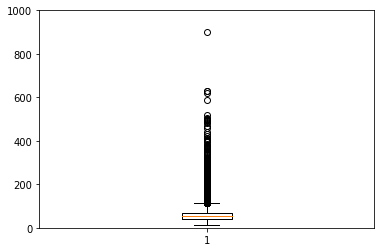

<function matplotlib.pyplot.show(*args, **kw)>

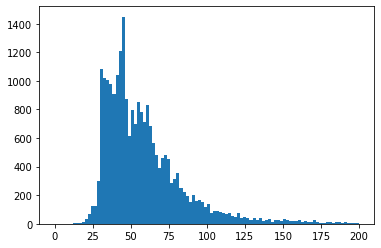

In [56]:
plt.boxplot(data['total_area'],)
plt.ylim(0,1000)
plt.show()

plt.hist(data['total_area'], bins=100, range=(0,200))
plt.show

In [57]:
data[['total_area']].query('total_area < 120').describe()

,total_area
count,22431.000000
mean,54.738632
std,19.920525
min,12.000000
25%,39.500000
50%,50.400000
75%,66.000000
max,119.800000


Значения больше 115 можно считать выбросами но они вполне возможны. Так что стелаем отсечку на 200 и 20.

In [58]:
data = data.query('(total_area > 20) & (total_area < 200)')

###  Цена

<function matplotlib.pyplot.show(*args, **kw)>

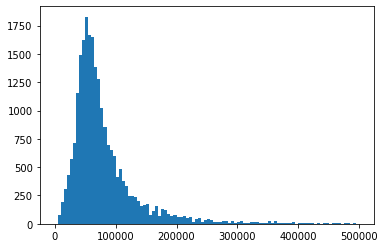

In [59]:
plt.hist(data['last_price'], bins=100, range=(0,500000))
plt.show

 Очень большое стандартное отклонение по цене, посмотрим на график.

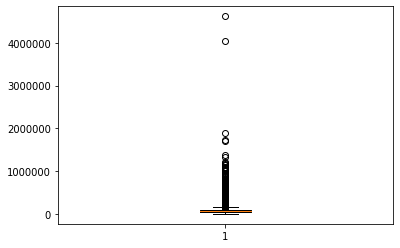

In [60]:
plt.boxplot(data['last_price'])
plt.show()

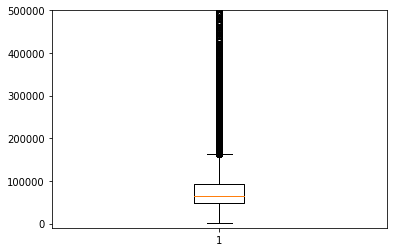

In [61]:
plt.boxplot(data['last_price'])
plt.ylim(-10000,500000)
plt.show()

In [62]:
data.query('last_price < 10000').groupby('locality_name')['last_price'].mean()

locality_name
Бокситогорск       8610.000000
Бор                7000.000000
Будогощь           6300.000000
Вахнова            6300.000000
Вещево             8400.000000
Выборг             9030.000000
Выскатка           8190.000000
Гаврилово          9100.000000
Глажево            9800.000000
Коркино            9100.000000
Луга               7700.000000
Никольский         8400.000000
Пикалёво           8656.666667
Санкт-Петербург     170.660000
Свирь              6020.000000
Серебрянский       8190.000000
Сланцы             8517.894737
Совхозный          7245.000000
Старополье         6440.000000
Фалилеево          9100.000000
Цвылёво            9100.000000
Чудской            7000.000000
Ям-Тесово          6300.000000
Name: last_price, dtype: float64

Удалим зачения меньше тысячи.

In [63]:
data = data.query('last_price > 1000')

In [64]:
len(data.query('last_price > 170000'))

1684

In [65]:
data[['last_price']].query('last_price < 170000').describe()


,last_price
count,21571.000000
mean,68412.343867
std,31861.647461
min,6020.000000
25%,46284.665000
50%,62300.000000
75%,84000.000000
max,169400.000000


Выбросы сильно влияют на среднее и стандартное отклонение посмотрим не связана ли цена с местоположением.

In [66]:
price_gr = data.query('last_price > 170000').groupby(
    'locality_name', as_index=False)[
    ['last_price']].mean().sort_values('last_price', ascending=False)
price_gr

,locality_name,last_price
13,Репино,392000.000000
2,Всеволожск,341780.600000
14,Санкт-Петербург,290052.278763
1,Бор,284132.800000
5,Зеленогорск,281487.500000
3,Выборг,279860.000000
11,Петергоф,265020.000000
7,Кронштадт,246820.000000
12,Пушкин,237963.600000
15,Сестрорецк,219634.800000


В данных с выбросами самые высокие цены в Репино И Санк-Петербрге.

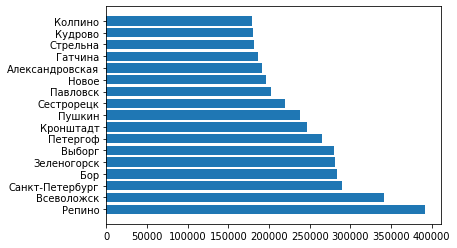

In [67]:
plt.barh(price_gr['locality_name'], price_gr['last_price'])
plt.show()

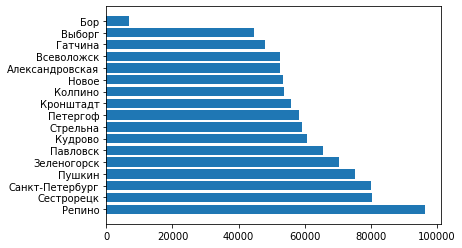

In [68]:
price_gr_clear = data.query('last_price < 170000').groupby(
    'locality_name', as_index=False)[
    ['last_price']].mean().sort_values('last_price', ascending=False)

price_gr_clear = price_gr_clear.query(
    'locality_name in @price_gr.locality_name').sort_values(
    'last_price',
    ascending=False)
plt.barh(price_gr_clear['locality_name'], price_gr_clear['last_price'])
plt.show()

Распределение сильно изменилось. Сравним данные с выбросами и без.

In [69]:
data_price = data.query(
    'locality_name in @price_gr.locality_name').sort_values(
    'last_price',
    ascending=False)

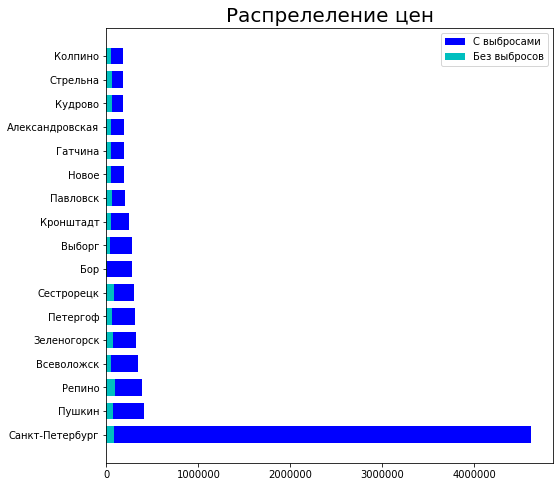

In [70]:
plt.subplots(figsize=(8, 8))
bw=0.7
plt.title('Распрелеление цен', fontsize=20)
plt.barh(data_price['locality_name'], data_price['last_price'], bw, color='b', label='С выбросами')
plt.barh(price_gr_clear['locality_name'] , price_gr_clear['last_price'], bw, color='c', label='Без выбросов')
plt.legend()
plt.show()

Выбросы крайне сильно влияют на результаты. Но дорогие квартиры сами по себе редкость, что бы не потерять даные о них оставим значения не более 200 000.

In [71]:
data = data.query('last_price < 200000')

### Количество комнат

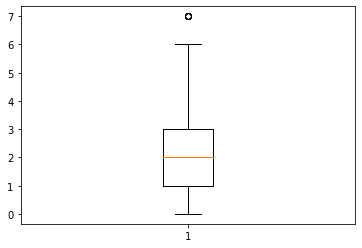

In [72]:
plt.boxplot(data['rooms'])
plt.show()

In [73]:
len(data.query('rooms > 6'))

5

In [74]:
len(data.query('rooms < 1'))

181

Квартиры с комнотами более 6 являются выбросами, удалим их. Так же отсутствуют данные о количестве комнат, их удаление не повлияет на результаты.

In [75]:
data = data.query('(rooms >= 1) & (rooms <= 6)')

### Время продажи квартир

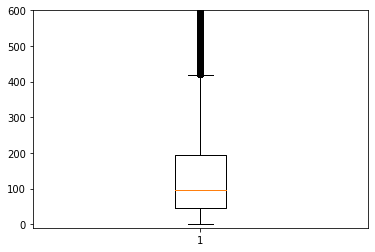

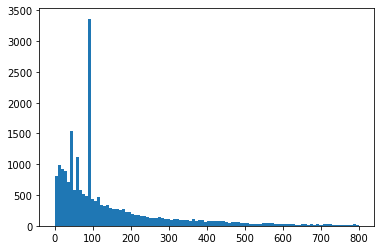

In [76]:
plt.boxplot(data['days_exposition'])
plt.ylim(-10,600)
plt.show()

plt.hist(data['days_exposition'], bins=100, range=(0, 800))
plt.show()

In [77]:
data['days_exposition'].describe()

count    21931.000000
mean       166.111212
std        202.694348
min          1.000000
25%         45.000000
50%         95.000000
75%        195.000000
max       1580.000000
Name: days_exposition, dtype: float64

Сроки продажи очень разняться. Если продажа произошла в течении 45 дней то можно считать что она прошла быстро, а если более 200 то наоборот. Большинство квартир продается в течении 100 дней, однако среднее время продажи сильно отличается. Проверим как цена влияет на время продажи. 

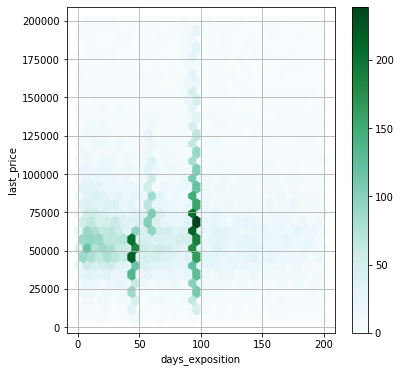

In [78]:
data.query('(last_price < 200000) & (days_exposition < 200)').plot(
    x='days_exposition',
    y='last_price',
    kind='hexbin',
    gridsize=30,
    figsize=(6, 6),
    sharex=False,
    grid=True) 

plt.show()

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

В целом в этой части все отлично сделано, ты достаточно внимательно все рассмотрел, построил очень наглядные диаграммы, молодец
    
</div>

### Поиск зависимостей

Быстрее всего продаются квартиры стоимость от 45 000 до 80 000. При этом явные пики продаж около 45  и 95 дней. 

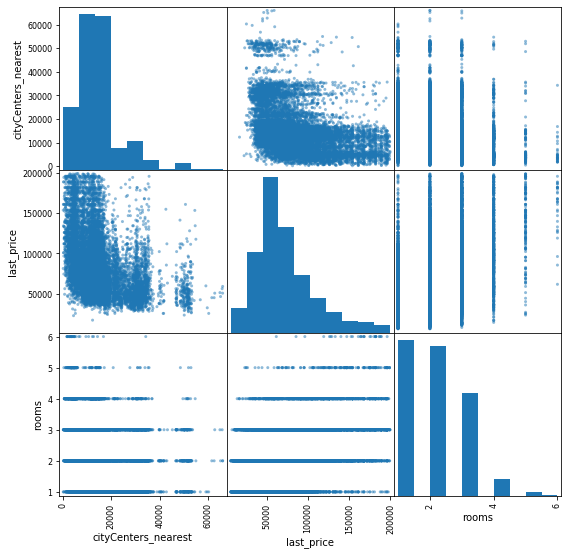

In [79]:
price_corr = data.pivot_table(index=data.index, 
                             values=['last_price','rooms','cityCenters_nearest'],
                             aggfunc='mean')
price_corr.corr()
pd.plotting.scatter_matrix(price_corr, figsize=(9, 9))
plt.show()

Мы видим что есть зависимость цены от близости к центру,а так же от количества комнат.

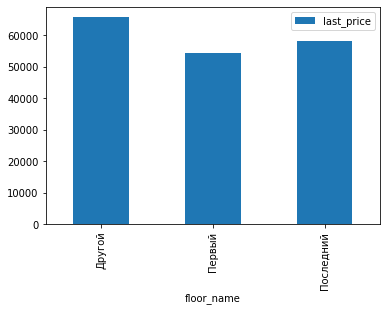

In [80]:
data.groupby('floor_name', as_index=False)['last_price'].median().plot(x='floor_name',
         y='last_price',
         kind='bar')
plt.show()

Мы видим небольшую разницу в цене между первым и последним этажем, но в большенстве своем квартиры на других этажах стоят дороже. 

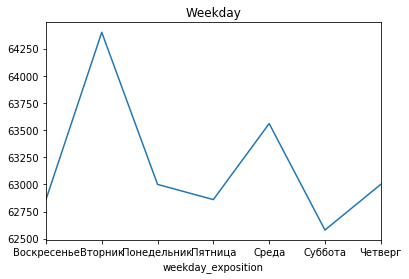

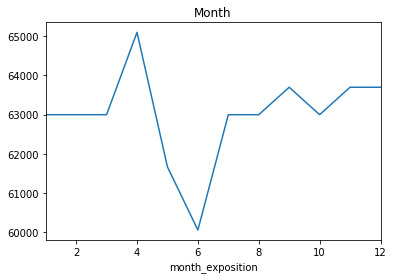

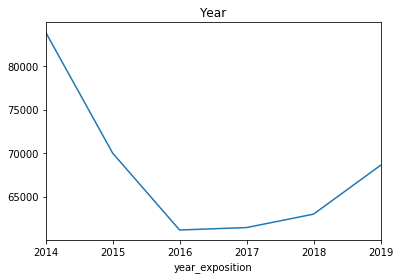

In [81]:
data.groupby('weekday_exposition')['last_price'].median().plot(x='weekday_exposition',
                                                               y='last_price',
                                                               title='Weekday')
plt.show()

data.groupby('month_exposition')['last_price'].median().plot(x='month_exposition',
                                                               y='last_price',
                                                               title='Month')
plt.show()

data.groupby('year_exposition')['last_price'].median().plot(x='year_exposition',
                                                               y='last_price',
                                                               title='Year')
plt.show()

Исходя из времени подачи объявления, весомые различия в цене есть только от года подачи объявления. Однако ближе к лету квартиры потеряли около 10 процентов от цены, но к середие лета цены вернулись на прежний уровень.

Узнаем населенные пункты с самым большим количеством обхъявлений. Так же посчитаем среднюю цену квадратного метра в них.

In [82]:
top_ten = data.groupby('locality_name', as_index=False)['studio'].count().sort_values('studio', ascending=False).head(10)
top_ten_price_per_meter = data.query(
    'locality_name in @top_ten.locality_name').groupby(
    'locality_name')[['price_per_meter']].mean(
    ).sort_values('price_per_meter', ascending=False)
top_ten_price_per_meter

,price_per_meter
locality_name,
Санкт-Петербург,1492.934555
Пушкин,1409.864937
Кудрово,1331.174274
Парголово,1266.277933
Мурино,1197.021415
Шушары,1095.891097
Колпино,1054.666141
Гатчина,962.607501
Всеволожск,941.398458


Самая высокая цена за метр оказалась в Санкт-Петербурге, самая дешевая в Выборге почти в два раза дороже.

Посчитаем расстояние до центра в километрах. Посмотрим как изменяется цена исходя из этого показателя в Петербурге. 

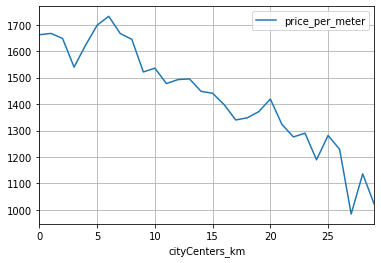

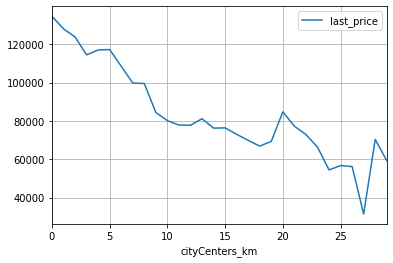

In [83]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()
saint_p = data.query('locality_name == "Санкт-Петербург" ')

saint_p.groupby('cityCenters_km')[['price_per_meter']].mean().plot(grid=True)
plt.show()

saint_p.groupby('cityCenters_km')[['last_price']].mean().plot(grid=True)
plt.show()

Цена начинает сильно расти начиная с 10 километров до центра.

In [84]:
saint_p_center = saint_p.query('cityCenters_km < 10')
saint_p_center.loc[:,['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3642.000000,3642.000000,3642.000000,3642.00000
mean,68.088957,107835.814614,2.372597,2.83525
std,26.560876,39592.607870,1.059009,0.32055
min,20.300000,22400.000000,1.000000,2.40000
25%,47.000000,77000.000000,2.000000,2.60000
50%,64.200000,102235.000000,2.000000,2.70000
75%,84.000000,134400.000000,3.000000,3.00000
max,190.000000,199500.000000,6.000000,5.30000


In [85]:
saint_p.loc[:,['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,14179.000000,14179.000000,14179.000000,14179.000000
mean,57.056661,84218.847922,2.043515,2.680786
std,21.964960,35562.549836,0.952540,0.215669
min,20.100000,16800.000000,1.000000,2.300000
25%,41.000000,58100.000000,1.000000,2.600000
50%,52.000000,74186.000000,2.000000,2.600000
75%,68.155000,100825.578000,3.000000,2.700000
max,190.000000,199500.000000,6.000000,5.300000


В среднем в центре площадь квартир больше при равном количестве комнат, а так же выше потолки, как и цены.

In [86]:
saint_p_corr = saint_p.corr()
saint_p_corr = saint_p_corr.where(saint_p_corr > 0.5 , None)
saint_p_corr = saint_p_corr[['last_price']].dropna().sort_values('last_price', ascending=False)
saint_p_corr.columns = ['correlation']
saint_p_corr

,correlation
last_price,1
total_area,0.810644
living_area,0.697761
kitchen_area,0.564351
rooms,0.541515


In [87]:
saint_p_corr_center = saint_p_center.corr()
saint_p_corr_center = saint_p_corr_center.where(saint_p_corr_center > 0.5 , None)
saint_p_corr_center = saint_p_corr_center[['last_price']].dropna().sort_values('last_price', ascending=False)
saint_p_corr_center.columns = ['correlation']
saint_p_corr_center

,correlation
last_price,1
total_area,0.747537
living_area,0.64963
rooms,0.533173


Как мы видим в центре и по всему городу на цену влияют одни и те же факторы, такие как: площадь(общая и жилая), количество комнат. За исключением площади кухни она не влияет серьезно на цену квартиры в центре.

## Общий вывод

   На основе этих данных мы видим что сроки продажи очень разнятся. Так например если продажа произошла в течении 45 дней то можно считать что она прошла быстро, а если более 200 то наоборот. При этом большинство квартир продается в течении 100 дней.
Быстрее всего продаются квартиры стоимость от 45 000 до 80 000 долларов.
   В цене квартир между первым и последним этажем большой разницы нет, однако первый этаж немного дешевле, но в большенстве своем квартиры на других этажах стоят дороже.
   Квартиры сильно дешевели начиная с 2014 и до 2016, после начался умеренный рост цен. 
   Самая высокая цена за метр оказалась в Санкт-Петербурге. Цена начинает сильно расти если квартира находится ближе 10 километров от центра.
   В среднем в центре площадь квартир больше при равном количестве комнат, а так же выше потолки, как и цены.
   Как мы видим в центре и по всему Санкт-Петербургу на цену влияют одни и те же факторы, такие как: площадь(общая и жилая), количество комнат. За исключением площади кухни она не оказывает такого влияния на цену квартиры в центре как по всему городу.